# Project 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, PoissonRegressor
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.reset_option('display.float_format')

In [34]:
df = pd.read_csv('Crime_cleaned.csv')

In [35]:
df.head()

,Unnamed: 0,ID,Case_Number,Date,Block,IUCR,Description,Arrest,Domestic,Beat,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location,Month,Day,Hour,Primary_Type_ASSAULT,Primary_Type_BATTERY,Primary_Type_BURGLARY,Primary_Type_CONCEALED CARRY LICENSE VIOLATION,Primary_Type_CRIM SEXUAL ASSAULT,Primary_Type_CRIMINAL DAMAGE,Primary_Type_CRIMINAL SEXUAL ASSAULT,Primary_Type_CRIMINAL TRESPASS,Primary_Type_DECEPTIVE PRACTICE,Primary_Type_GAMBLING,Primary_Type_HOMICIDE,Primary_Type_HUMAN TRAFFICKING,Primary_Type_INTERFERENCE WITH PUBLIC OFFICER,Primary_Type_INTIMIDATION,Primary_Type_KIDNAPPING,Primary_Type_LIQUOR LAW VIOLATION,Primary_Type_MOTOR VEHICLE THEFT,Primary_Type_NARCOTICS,Primary_Type_NON-CRIMINAL,Primary_Type_OBSCENITY,Primary_Type_OFFENSE INVOLVING CHILDREN,Primary_Type_OTHER NARCOTIC VIOLATION,Primary_Type_OTHER OFFENSE,Primary_Type_PROSTITUTION,Primary_Type_PUBLIC INDECENCY,Primary_Type_PUBLIC PEACE VIOLATION,Primary_Type_RITUALISM,Primary_Type_ROBBERY,Primary_Type_SEX OFFENSE,Primary_Type_STALKING,Primary_Type_THEFT,Primary_Type_WEAPONS VIOLATION,District_002,District_003,District_004,District_005,District_006,District_007,District_008,District_009,District_010,District_011,District_012,District_014,District_015,District_016,District_017,District_018,District_019,District_020,District_022,District_024,District_025,District_031,District_16,Location_Description_AIRCRAFT,Location_Description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,Location_Description_AIRPORT BUILDING NON-TERMINAL - SECURE AREA,Location_Description_AIRPORT EXTERIOR - NON-SECURE AREA,Location_Description_AIRPORT EXTERIOR - SECURE AREA,Location_Description_AIRPORT PARKING LOT,Location_Description_AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,Location_Description_AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,Location_Description_AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,Location_Description_AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,Location_Description_AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,Location_Description_AIRPORT TRANSPORTATION SYSTEM (ATS),Location_Description_AIRPORT VENDING ESTABLISHMENT,Location_Description_AIRPORT/AIRCRAFT,Location_Description_ALLEY,Location_Description_ANIMAL HOSPITAL,Location_Description_APARTMENT,Location_Description_APPLIANCE STORE,Location_Description_ATHLETIC CLUB,Location_Description_ATM (AUTOMATIC TELLER MACHINE),Location_Description_AUTO,Location_Description_AUTO / BOAT / RV DEALERSHIP,Location_Description_BANK,Location_Description_BANQUET HALL,Location_Description_BAR OR TAVERN,Location_Description_BARBER SHOP/BEAUTY SALON,Location_Description_BARBERSHOP,Location_Description_BASEMENT,Location_Description_BEACH,Location_Description_BOAT / WATERCRAFT,Location_Description_BOAT/WATERCRAFT,Location_Description_BOWLING ALLEY,Location_Description_BRIDGE,Location_Description_CAR WASH,Location_Description_CEMETARY,Location_Description_CHA APARTMENT,Location_Description_CHA ELEVATOR,Location_Description_CHA GROUNDS,Location_Description_CHA HALLWAY,Location_Description_CHA HALLWAY / STAIRWELL / ELEVATOR,Location_Description_CHA HALLWAY/STAIRWELL/ELEVATOR,Location_Description_CHA LOBBY,Location_Description_CHA PARKING LOT,Location_Description_CHA PARKING LOT / GROUNDS,Location_Description_CHA PARKING LOT/GROUNDS,Location_Description_CHA PLAY LOT,Location_Description_CHA STAIRWELL,Location_Description_CHURCH / SYNAGOGUE / PLACE OF WORSHIP,Location_Description_CHURCH/SYNAGOGUE/PLACE OF WORSHIP,Location_Description_CLEANING STORE,Location_Description_CLUB,Location_Description_COIN OPERATED MACHINE,Location_Description_COLLEGE / UNIVERSITY - GROUNDS,Location_Description_COLLEGE / UNIVERSITY - RESIDENCE HALL,Location_Description_COLLEGE/UNIVERSITY GROUNDS,Location_Description_COLLEGE/UNIVERSITY RESIDENCE HALL,Location_Description_COMMERCIAL / BUSINESS OFFICE,Location_Description_CONSTRUCTION SITE,Location_Description_CONVENIENCE STORE,Location_Description_CREDIT UNION,"Location_De

In [36]:
#df.drop(columns=['ID', 'Unnamed: 0', 'Date', 'Beat', 'Ward', 'IUCR', 'FBI_Code', 'Community_Area', 'Case_Number', 'Updated_On', 'Location', 'X_Coordinate', 'Y_Coordinate', 'Block', 'Description'], inplace = True)#, 'Latitude', 'Longitude'

In [37]:
df.drop(columns=['Unnamed: 0', 'IUCR', 'FBI_Code', 'X_Coordinate', 'Y_Coordinate', 'Block', 'Date', 'Case_Number', 'Updated_On', 'Location', 'Description'], inplace = True)#, 'Latitude', 'Longitude'

In [38]:
df.head()

,ID,Arrest,Domestic,Beat,Ward,Community_Area,Year,Latitude,Longitude,Month,Day,Hour,Primary_Type_ASSAULT,Primary_Type_BATTERY,Primary_Type_BURGLARY,Primary_Type_CONCEALED CARRY LICENSE VIOLATION,Primary_Type_CRIM SEXUAL ASSAULT,Primary_Type_CRIMINAL DAMAGE,Primary_Type_CRIMINAL SEXUAL ASSAULT,Primary_Type_CRIMINAL TRESPASS,Primary_Type_DECEPTIVE PRACTICE,Primary_Type_GAMBLING,Primary_Type_HOMICIDE,Primary_Type_HUMAN TRAFFICKING,Primary_Type_INTERFERENCE WITH PUBLIC OFFICER,Primary_Type_INTIMIDATION,Primary_Type_KIDNAPPING,Primary_Type_LIQUOR LAW VIOLATION,Primary_Type_MOTOR VEHICLE THEFT,Primary_Type_NARCOTICS,Primary_Type_NON-CRIMINAL,Primary_Type_OBSCENITY,Primary_Type_OFFENSE INVOLVING CHILDREN,Primary_Type_OTHER NARCOTIC VIOLATION,Primary_Type_OTHER OFFENSE,Primary_Type_PROSTITUTION,Primary_Type_PUBLIC INDECENCY,Primary_Type_PUBLIC PEACE VIOLATION,Primary_Type_RITUALISM,Primary_Type_ROBBERY,Primary_Type_SEX OFFENSE,Primary_Type_STALKING,Primary_Type_THEFT,Primary_Type_WEAPONS VIOLATION,District_002,District_003,District_004,District_005,District_006,District_007,District_008,District_009,District_010,District_011,District_012,District_014,District_015,District_016,District_017,District_018,District_019,District_020,District_022,District_024,District_025,District_031,District_16,Location_Description_AIRCRAFT,Location_Description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,Location_Description_AIRPORT BUILDING NON-TERMINAL - SECURE AREA,Location_Description_AIRPORT EXTERIOR - NON-SECURE AREA,Location_Description_AIRPORT EXTERIOR - SECURE AREA,Location_Description_AIRPORT PARKING LOT,Location_Description_AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,Location_Description_AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,Location_Description_AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,Location_Description_AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,Location_Description_AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,Location_Description_AIRPORT TRANSPORTATION SYSTEM (ATS),Location_Description_AIRPORT VENDING ESTABLISHMENT,Location_Description_AIRPORT/AIRCRAFT,Location_Description_ALLEY,Location_Description_ANIMAL HOSPITAL,Location_Description_APARTMENT,Location_Description_APPLIANCE STORE,Location_Description_ATHLETIC CLUB,Location_Description_ATM (AUTOMATIC TELLER MACHINE),Location_Description_AUTO,Location_Description_AUTO / BOAT / RV DEALERSHIP,Location_Description_BANK,Location_Description_BANQUET HALL,Location_Description_BAR OR TAVERN,Location_Description_BARBER SHOP/BEAUTY SALON,Location_Description_BARBERSHOP,Location_Description_BASEMENT,Location_Description_BEACH,Location_Description_BOAT / WATERCRAFT,Location_Description_BOAT/WATERCRAFT,Location_Description_BOWLING ALLEY,Location_Description_BRIDGE,Location_Description_CAR WASH,Location_Description_CEMETARY,Location_Description_CHA APARTMENT,Location_Description_CHA ELEVATOR,Location_Description_CHA GROUNDS,Location_Description_CHA HALLWAY,Location_Description_CHA HALLWAY / STAIRWELL / ELEVATOR,Location_Description_CHA HALLWAY/STAIRWELL/ELEVATOR,Location_Description_CHA LOBBY,Location_Description_CHA PARKING LOT,Location_Description_CHA PARKING LOT / GROUNDS,Location_Description_CHA PARKING LOT/GROUNDS,Location_Description_CHA PLAY LOT,Location_Description_CHA STAIRWELL,Location_Description_CHURCH / SYNAGOGUE / PLACE OF WORSHIP,Location_Description_CHURCH/SYNAGOGUE/PLACE OF WORSHIP,Location_Description_CLEANING STORE,Location_Description_CLUB,Location_Description_COIN OPERATED MACHINE,Location_Description_COLLEGE / UNIVERSITY - GROUNDS,Location_Description_COLLEGE / UNIVERSITY - RESIDENCE HALL,Location_Description_COLLEGE/UNIVERSITY GROUNDS,Location_Description_COLLEGE/UNIVERSITY RESIDENCE HALL,Location_Description_COMMERCIAL / BUSINESS OFFICE,Location_Description_CONSTRUCTION SITE,Location_Description_CONVENIENCE STORE,Location_Description_CREDIT UNION,"Location_Description_CTA ""L"" PLATFORM","Location_Description_CTA ""L"" TRAIN",Location_Description_CTA BUS,Location

In [39]:
# Drop columns that start with 'Location_Description_'
df = df.loc[:, ~df.columns.str.startswith('Location_Description_')]
df = df.loc[:, ~df.columns.str.startswith('District_')]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166663 entries, 0 to 1166662
Data columns (total 44 columns):
 #   Column                                          Non-Null Count    Dtype  
---  ------                                          --------------    -----  
 0   ID                                              1166663 non-null  int64  
 1   Arrest                                          1166663 non-null  int64  
 2   Domestic                                        1166663 non-null  int64  
 3   Beat                                            1166663 non-null  int64  
 4   Ward                                            1166616 non-null  float64
 5   Community_Area                                  1166662 non-null  float64
 6   Year                                            1166663 non-null  int64  
 7   Latitude                                        1166663 non-null  float64
 8   Longitude                                       1166663 non-null  float64
 9   Month        

In [41]:
df.head()

,ID,Arrest,Domestic,Beat,Ward,Community_Area,Year,Latitude,Longitude,Month,Day,Hour,Primary_Type_ASSAULT,Primary_Type_BATTERY,Primary_Type_BURGLARY,Primary_Type_CONCEALED CARRY LICENSE VIOLATION,Primary_Type_CRIM SEXUAL ASSAULT,Primary_Type_CRIMINAL DAMAGE,Primary_Type_CRIMINAL SEXUAL ASSAULT,Primary_Type_CRIMINAL TRESPASS,Primary_Type_DECEPTIVE PRACTICE,Primary_Type_GAMBLING,Primary_Type_HOMICIDE,Primary_Type_HUMAN TRAFFICKING,Primary_Type_INTERFERENCE WITH PUBLIC OFFICER,Primary_Type_INTIMIDATION,Primary_Type_KIDNAPPING,Primary_Type_LIQUOR LAW VIOLATION,Primary_Type_MOTOR VEHICLE THEFT,Primary_Type_NARCOTICS,Primary_Type_NON-CRIMINAL,Primary_Type_OBSCENITY,Primary_Type_OFFENSE INVOLVING CHILDREN,Primary_Type_OTHER NARCOTIC VIOLATION,Primary_Type_OTHER OFFENSE,Primary_Type_PROSTITUTION,Primary_Type_PUBLIC INDECENCY,Primary_Type_PUBLIC PEACE VIOLATION,Primary_Type_RITUALISM,Primary_Type_ROBBERY,Primary_Type_SEX OFFENSE,Primary_Type_STALKING,Primary_Type_THEFT,Primary_Type_WEAPONS VIOLATION
0,24984,1,0,2222,21.0,73.0,2019,41.721251,-87.659592,4,7,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,12010361,0,0,1824,42.0,8.0,2020,41.901575,-87.627182,3,16,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,12183248,0,0,235,5.0,41.0,2020,41.787887,-87.587847,9,30,15,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,27048,0,0,1111,37.0,23.0,2022,41.897989,-87.726164,9,9,16,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,25177,0,0,331,5.0,43.0,2020,41.767798,-87.571448,3,14,18,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
df=df.dropna()

In [43]:
df=df.drop('ID', axis=1)

In [44]:
df.head()

,Arrest,Domestic,Beat,Ward,Community_Area,Year,Latitude,Longitude,Month,Day,Hour,Primary_Type_ASSAULT,Primary_Type_BATTERY,Primary_Type_BURGLARY,Primary_Type_CONCEALED CARRY LICENSE VIOLATION,Primary_Type_CRIM SEXUAL ASSAULT,Primary_Type_CRIMINAL DAMAGE,Primary_Type_CRIMINAL SEXUAL ASSAULT,Primary_Type_CRIMINAL TRESPASS,Primary_Type_DECEPTIVE PRACTICE,Primary_Type_GAMBLING,Primary_Type_HOMICIDE,Primary_Type_HUMAN TRAFFICKING,Primary_Type_INTERFERENCE WITH PUBLIC OFFICER,Primary_Type_INTIMIDATION,Primary_Type_KIDNAPPING,Primary_Type_LIQUOR LAW VIOLATION,Primary_Type_MOTOR VEHICLE THEFT,Primary_Type_NARCOTICS,Primary_Type_NON-CRIMINAL,Primary_Type_OBSCENITY,Primary_Type_OFFENSE INVOLVING CHILDREN,Primary_Type_OTHER NARCOTIC VIOLATION,Primary_Type_OTHER OFFENSE,Primary_Type_PROSTITUTION,Primary_Type_PUBLIC INDECENCY,Primary_Type_PUBLIC PEACE VIOLATION,Primary_Type_RITUALISM,Primary_Type_ROBBERY,Primary_Type_SEX OFFENSE,Primary_Type_STALKING,Primary_Type_THEFT,Primary_Type_WEAPONS VIOLATION
0,1,0,2222,21.0,73.0,2019,41.721251,-87.659592,4,7,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,0,1824,42.0,8.0,2020,41.901575,-87.627182,3,16,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,0,235,5.0,41.0,2020,41.787887,-87.587847,9,30,15,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,0,1111,37.0,23.0,2022,41.897989,-87.726164,9,9,16,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0,0,331,5.0,43.0,2020,41.767798,-87.571448,3,14,18,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [45]:
# Drop columns that start with 'Location_Description_'
df = df.loc[:, ~df.columns.str.startswith('Location_Description_')]
df = df.loc[:, ~df.columns.str.startswith('District_')]

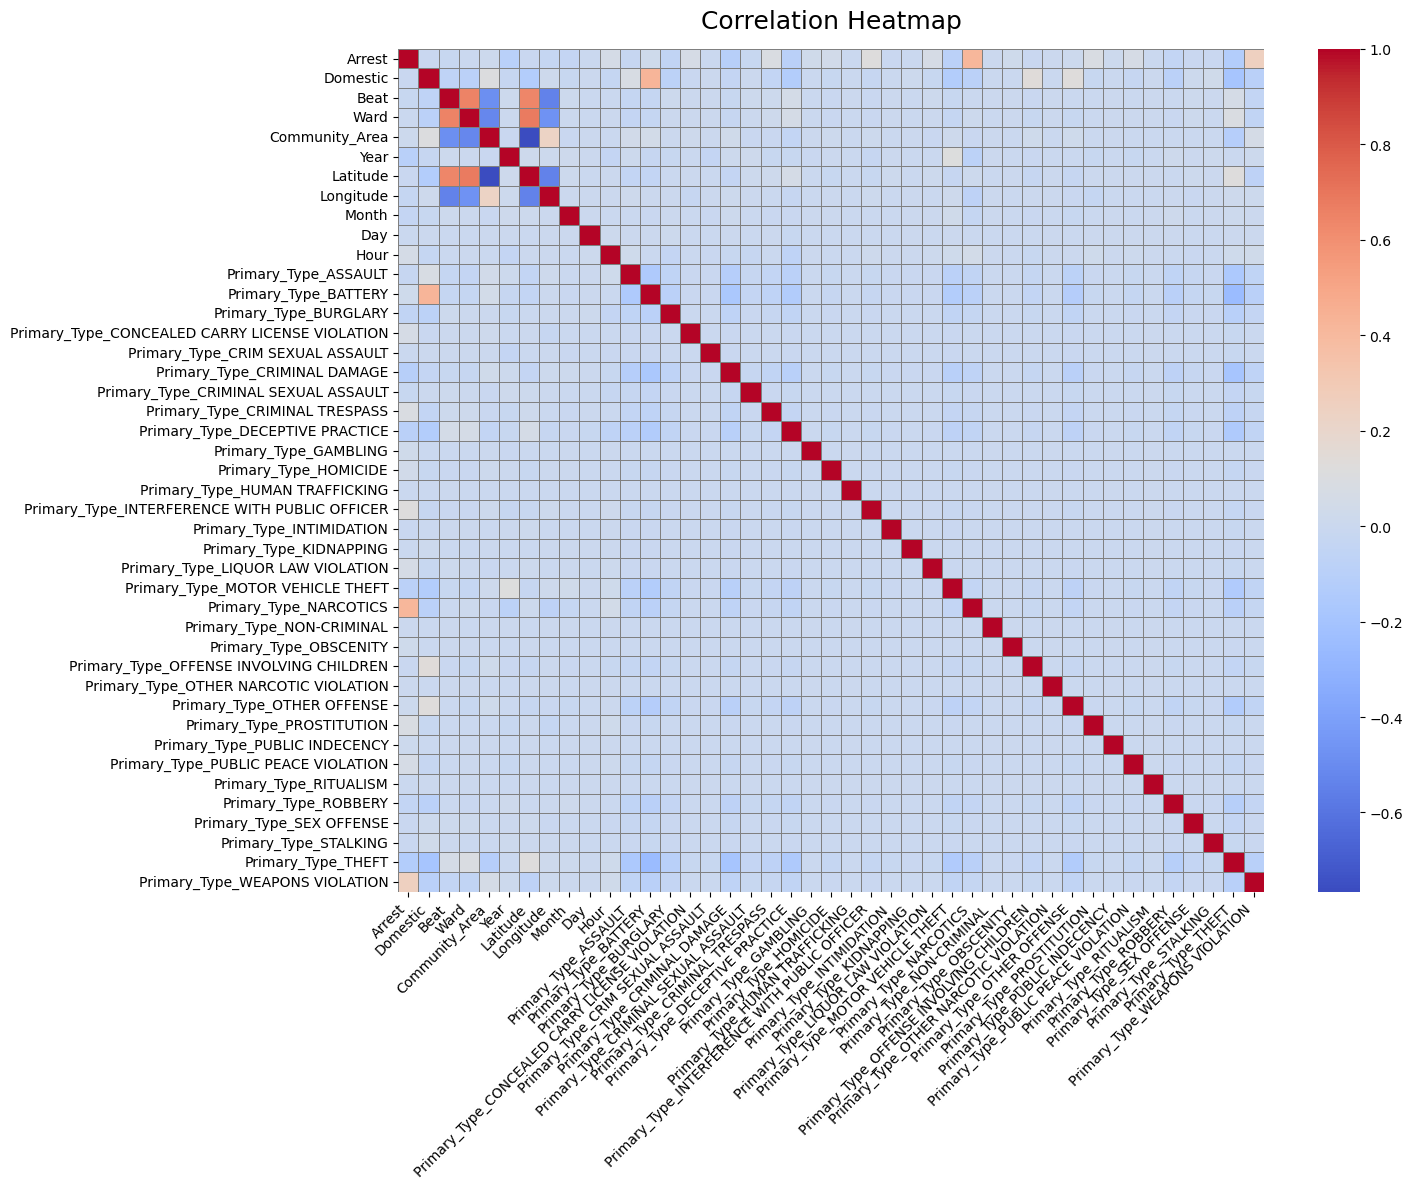

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=True,
            linewidths=0.5, linecolor='gray')

# Add titles and labels
plt.title("Correlation Heatmap", fontsize=18, pad=15)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Focus on correlations with the target variable
target_corr = corr_matrix['Arrest']

# Filter columns with correlation > 0.2 or < -0.2
relevant_features = target_corr[(target_corr > 0.02) | (target_corr < -0.02)].index

# Create a new DataFrame with only the relevant features
filtered_df = df[relevant_features]

print(filtered_df.head())

   Arrest  Year  Longitude  Month  Hour  Primary_Type_ASSAULT  \
0       1  2019 -87.659592      4     1                 False   
1       0  2020 -87.627182      3     0                 False   
2       0  2020 -87.587847      9    15                 False   
3       0  2022 -87.726164      9    16                 False   
4       0  2020 -87.571448      3    18                 False   

   Primary_Type_BATTERY  Primary_Type_BURGLARY  \
0                 False                  False   
1                 False                  False   
2                 False                  False   
3                 False                  False   
4                 False                  False   

   Primary_Type_CONCEALED CARRY LICENSE VIOLATION  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                          

In [52]:
filtered_df.columns

Index(['Arrest', 'Year', 'Longitude', 'Month', 'Hour', 'Primary_Type_ASSAULT',
       'Primary_Type_BATTERY', 'Primary_Type_BURGLARY',
       'Primary_Type_CONCEALED CARRY LICENSE VIOLATION',
       'Primary_Type_CRIMINAL DAMAGE', 'Primary_Type_CRIMINAL TRESPASS',
       'Primary_Type_DECEPTIVE PRACTICE', 'Primary_Type_GAMBLING',
       'Primary_Type_HOMICIDE',
       'Primary_Type_INTERFERENCE WITH PUBLIC OFFICER',
       'Primary_Type_LIQUOR LAW VIOLATION', 'Primary_Type_MOTOR VEHICLE THEFT',
       'Primary_Type_NARCOTICS', 'Primary_Type_OBSCENITY',
       'Primary_Type_PROSTITUTION', 'Primary_Type_PUBLIC PEACE VIOLATION',
       'Primary_Type_ROBBERY', 'Primary_Type_THEFT',
       'Primary_Type_WEAPONS VIOLATION'],
      dtype='object')

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94    297878
           1       0.80      0.39      0.53     52107

    accuracy                           0.89    349985
   macro avg       0.85      0.69      0.73    349985
weighted avg       0.89      0.89      0.88    349985



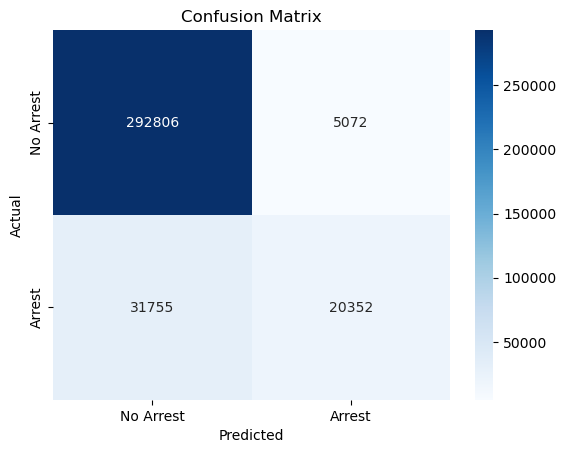

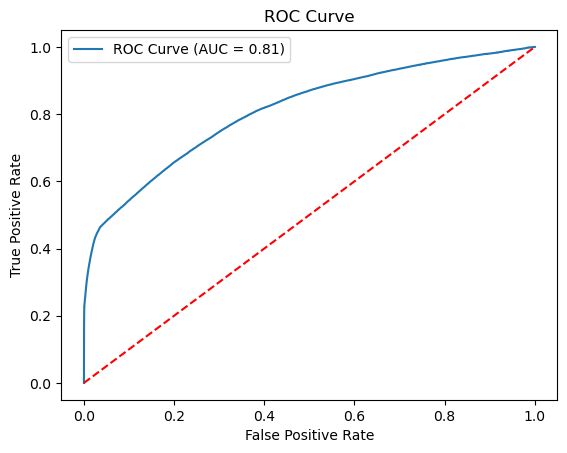

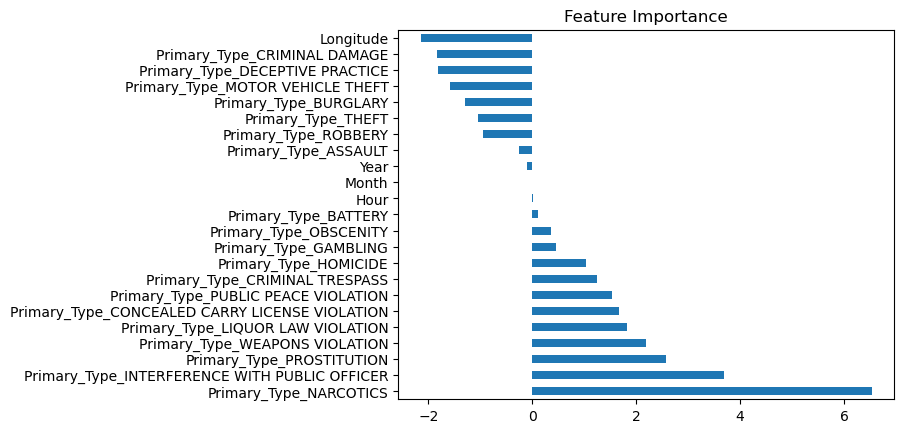

In [ ]:
# Convert the target variable 'Arrest' to binary
filtered_df['Arrest'] = filtered_df['Arrest'].astype(int)

# Split the dataset into training and testing sets
X = filtered_df.drop('Arrest', axis=1)
y = filtered_df['Arrest']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, stratify=y)

# Build the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Arrest", "Arrest"], yticklabels=["No Arrest", "Arrest"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Feature importance
coefficients = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
coefficients.plot(kind='barh')
plt.title("Feature Importance")
plt.show()


In [ ]:
# Log-likelihood of the fitted model
log_likelihood_model = np.sum(y_test * np.log(y_proba) + (1 - y_test) * np.log(1 - y_proba))

# Null model log-likelihood (all probabilities are the mean of the target variable)
p_null = np.mean(y_test)
log_likelihood_null = np.sum(y_test * np.log(p_null) + (1 - y_test) * np.log(1 - p_null))

# McFadden's R-squared
mcfadden_r_squared = 1 - (log_likelihood_model / log_likelihood_null)
print(f"McFadden's R-squared: {mcfadden_r_squared:.4f}")

McFadden's R-squared: 0.2837


In [63]:
# Extract confusion matrix values
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate precision
precision = tp / (tp + fp)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = tp / (tp + fn)
print(f"Recall: {recall:.2f}")


Precision: 0.80
Recall: 0.39


In [56]:
X = X.astype(int)

In [57]:
# Add constant for intercept
X = sm.add_constant(X)

In [58]:
X.dtypes

const                                             int64
Year                                              int64
Longitude                                         int64
Month                                             int64
Hour                                              int64
Primary_Type_ASSAULT                              int64
Primary_Type_BATTERY                              int64
Primary_Type_BURGLARY                             int64
Primary_Type_CONCEALED CARRY LICENSE VIOLATION    int64
Primary_Type_CRIMINAL DAMAGE                      int64
Primary_Type_CRIMINAL TRESPASS                    int64
Primary_Type_DECEPTIVE PRACTICE                   int64
Primary_Type_GAMBLING                             int64
Primary_Type_HOMICIDE                             int64
Primary_Type_INTERFERENCE WITH PUBLIC OFFICER     int64
Primary_Type_LIQUOR LAW VIOLATION                 int64
Primary_Type_MOTOR VEHICLE THEFT                  int64
Primary_Type_NARCOTICS                          

In [ ]:
# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary
print(result.summary())


         Current function value: 0.297583
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Arrest   No. Observations:              1166616
Model:                          Logit   Df Residuals:                  1166592
Method:                           MLE   Df Model:                           23
Date:                Thu, 12 Dec 2024   Pseudo R-squ.:                  0.2928
Time:                        02:34:15   Log-Likelihood:            -3.4717e+05
converged:                      False   LL-Null:                   -4.9088e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.0411        nan    